# OpenCV 기본 예제

이미지에서 엣지를 디텍팅하여 선을 추출해 내는 예제

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


필요한 모듈 로드

In [2]:
chessBoardImage = cv2.imread('chessBoard.jpg', 0)

타겟으로 할 체스 보드 이미지 로드

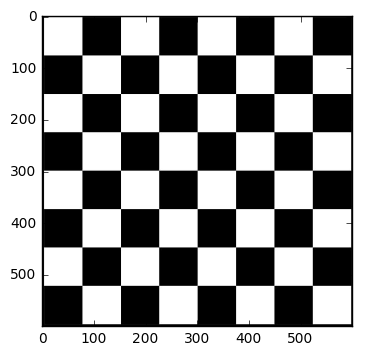

In [3]:
plt.imshow(chessBoardImage, cmap = "gray")

로드 테스트겸 출력

In [4]:
blankImage = np.zeros(chessBoardImage.shape, np.uint8)

추출된 선을 그려낼 비어있는 이미지 생성

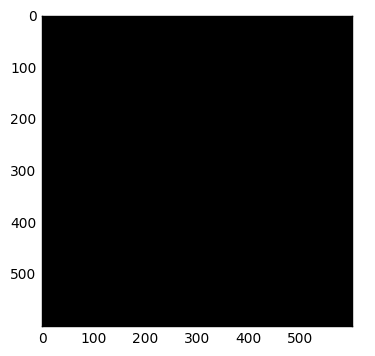

In [5]:
plt.imshow(blankImage, cmap = "gray")

생성 후 테스트 출력

In [6]:
chessBoardEdges = cv2.Canny(chessBoardImage, chessBoardImage.shape[0], chessBoardImage.shape[1], 
                           apertureSize = 3)

체스 보드 엣지 검출

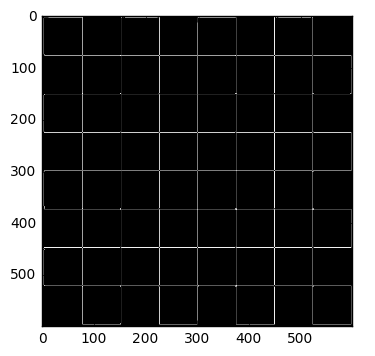

In [7]:
plt.imshow(chessBoardEdges, cmap = "gray")

검출 후 출력

In [8]:
foundLines = cv2.HoughLines(chessBoardEdges, 1, np.pi / 180, 200)
print foundLines[0]

[[  78.            0.        ]
 [  78.            1.57079637]
 [ 374.            1.57079637]
 [ 374.            0.        ]
 [ 448.            1.57079637]
 [ 522.            1.57079637]
 [ 226.            1.57079637]
 [ 300.            1.57079637]
 [ 448.            0.        ]
 [ 522.            0.        ]
 [ 226.            0.        ]
 [ 300.            0.        ]
 [ 152.            0.        ]
 [ 152.            1.57079637]
 [ 596.            1.57079637]
 [ 596.            0.        ]
 [   4.            1.57079637]
 [   3.            0.        ]]


찾아진 픽셀 길이, 세타 정보를 출력

In [9]:
for pixelLength, lineDirectionTheta in foundLines[0]:
    lineCosDirection = np.cos(lineDirectionTheta)
    lineSinDirection = np.sin(lineDirectionTheta)
    baseX = lineCosDirection * pixelLength
    baseY = lineSinDirection * pixelLength
    #print baseX, baseY
    topLeftX = int(baseX + 1000 * -lineSinDirection)
    topLeftY = int(baseY + 1000 * lineCosDirection)
    botRightX = int(baseX - 1000 * -lineSinDirection)
    botRightY = int(baseY - 1000 * lineCosDirection)
    print (topLeftX, topLeftY), (botRightX, botRightY)
    
    cv2.line(blankImage, (topLeftX, topLeftY), (botRightX, botRightY), 255, 2)

(78, 1000) (78, -1000)
(-1000, 77) (999, 78)
(-1000, 373) (999, 374)
(374, 1000) (374, -1000)
(-1000, 447) (999, 448)
(-1000, 521) (999, 522)
(-1000, 225) (999, 226)
(-1000, 299) (999, 300)
(448, 1000) (448, -1000)
(522, 1000) (522, -1000)
(226, 1000) (226, -1000)
(300, 1000) (300, -1000)
(152, 1000) (152, -1000)
(-1000, 151) (999, 152)
(-1000, 595) (999, 596)
(596, 1000) (596, -1000)
(-1000, 3) (999, 4)
(3, 1000) (3, -1000)


계산을 통해 선을 그림

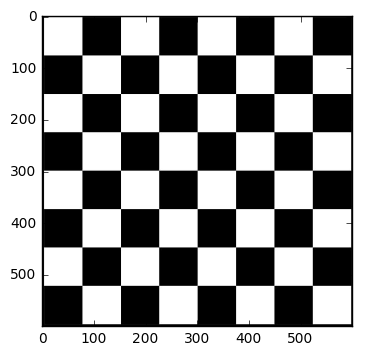

In [10]:
plt.imshow(chessBoardImage, cmap = "gray")

타겟 체스판 모습

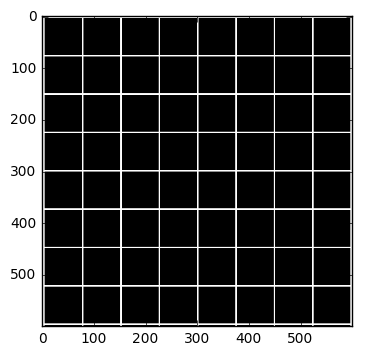

In [11]:
plt.imshow(blankImage, cmap = "gray")

라인이 검출된 체스판 모습